<a href="https://colab.research.google.com/github/HeberPareja/IA-MiniRobots_2024-2/blob/master/EjercicioN6_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   Ejercicio N° 6.4
*   Universidad Nacional de Colombia
*   Inteligencia Artificial y Mini-Robots 2024-2
*   Heber Alexander Pareja Romero
*   haparejar@unal.edu.co

# **<> Introducción**

Este código implementa el algoritmo K-Nearest Neighbors (KNN) con el conjunto de datos Wine de scikit-learn, realizando carga y exploración del dataset, preprocesamiento mediante división en conjuntos de entrenamiento y prueba con escalado, entrenamiento del modelo con distintos valores de k, selección del mejor k según desempeño y generación de un reporte de clasificación, además de visualizar la frontera de decisión para analizar cómo el modelo clasifica los datos, siendo una herramienta ideal para entender el funcionamiento y el impacto de los parámetros en el rendimiento de KNN.

# <> **Desarrollo**

Se importan bibliotecas necesarias

In [ ]:
import numpy as np  # Biblioteca para manejo de arreglos y cálculos numéricos
import matplotlib.pyplot as plt  # Biblioteca para visualización de gráficos
import seaborn as sns  # Biblioteca para visualización de datos con gráficos estadísticos
from sklearn.datasets import load_wine  # Cargar el conjunto de datos Wine
from sklearn.model_selection import train_test_split  # Para dividir los datos en entrenamiento y prueba
from sklearn.preprocessing import StandardScaler  # Para normalizar las características
from sklearn.neighbors import KNeighborsClassifier  # Implementación del clasificador KNN
from sklearn.metrics import accuracy_score, classification_report  # Métricas de evaluación del modelo

Se carga el dataset Wine, se seleccionan dos características y se visualiza la distribución de los datos con un gráfico de dispersión coloreado según la clase de vino.

Características del dataset: ['alcohol', 'malic_acid']
Clases: ['class_0' 'class_1' 'class_2']


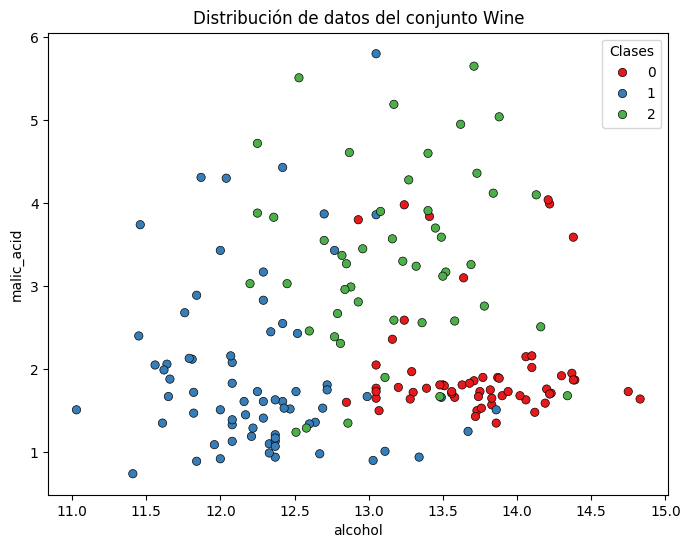

In [ ]:
# Cargar el dataset Wine
wine = load_wine()
X = wine.data[:, :2]  # Seleccionamos solo las dos primeras características para visualización
y = wine.target  # Variable objetivo

# Exploración de datos
print("Características del dataset:", wine.feature_names[:2])  # Imprimir nombres de las dos características seleccionadas
print("Clases:", wine.target_names)  # Imprimir nombres de las clases de vino

# Visualización de datos inicial
plt.figure(figsize=(8,6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='Set1', edgecolor='k')  # Graficar los datos con colores por clase
plt.xlabel(wine.feature_names[0])  # Etiqueta del eje X
plt.ylabel(wine.feature_names[1])  # Etiqueta del eje Y
plt.title("Distribución de datos del conjunto Wine")  # Título del gráfico
plt.legend(title="Clases")  # Agregar leyenda con el título "Clases"
plt.show()

Se dividen los datos en entrenamiento y prueba, los escala para mejorar el rendimiento del modelo y entrena KNN con distintos valores de $k$. Luego, evalúa la precisión de cada modelo y la grafica para analizar cómo varía con $k$.

K=1: 0.83
K=3: 0.89
K=5: 0.81
K=7: 0.78
K=9: 0.86


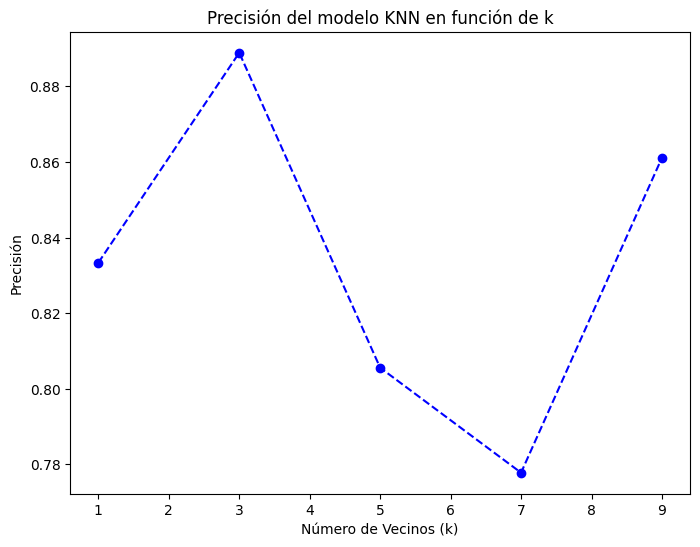

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos para mejorar el rendimiento del modelo
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Ajustar y transformar el conjunto de entrenamiento
X_test_scaled = scaler.transform(X_test)  # Transformar el conjunto de prueba con los mismos parámetros

# Pruebas con diferentes valores de k
k_values = [1, 3, 5, 7, 9]  # Lista de valores de k a probar
accuracy_scores = []  # Lista para almacenar la precisión de cada k

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)  # Inicializar el modelo con k vecinos
    knn.fit(X_train_scaled, y_train)  # Entrenar el modelo con los datos escalados
    y_pred = knn.predict(X_test_scaled)  # Predecir el conjunto de prueba
    accuracy = accuracy_score(y_test, y_pred)  # Calcular la precisión
    accuracy_scores.append(accuracy)  # Almacenar la precisión en la lista
    print(f"K={k}: {accuracy:.2f}")  # Imprimir la precisión para cada k

# Gráfica de precisión vs k
plt.figure(figsize=(8,6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='dashed', color='b')  # Graficar la precisión en función de k
plt.xlabel("Número de Vecinos (k)")  # Etiqueta del eje X
plt.ylabel("Precisión")  # Etiqueta del eje Y
plt.title("Precisión del modelo KNN en función de k")  # Título del gráfico
plt.show()

Se selecciona el mejor valor de $k$ según la mayor precisión, entrena un modelo KNN con ese $k$, realiza predicciones en el conjunto de prueba y genera un reporte de clasificación con métricas detalladas.

In [ ]:
# Entrenar el modelo con el mejor k encontrado
best_k = k_values[np.argmax(accuracy_scores)]  # Seleccionar el k con la mayor precisión
knn_best = KNeighborsClassifier(n_neighbors=best_k)  # Inicializar el modelo con el mejor k
knn_best.fit(X_train_scaled, y_train)  # Entrenar el modelo
y_best_pred = knn_best.predict(X_test_scaled)  # Predecir con el mejor modelo

# Reporte de clasificación
print("Reporte de Clasificación para KNN con k=", best_k)
print(classification_report(y_test, y_best_pred, target_names=wine.target_names))  # Mostrar el reporte de clasificación

Reporte de Clasificación para KNN con k= 3
              precision    recall  f1-score   support

     class_0       1.00      0.86      0.92        14
     class_1       1.00      0.86      0.92        14
     class_2       0.67      1.00      0.80         8

    accuracy                           0.89        36
   macro avg       0.89      0.90      0.88        36
weighted avg       0.93      0.89      0.90        36



Se define una función para graficar la frontera de decisión de un modelo KNN, generando una malla de puntos y coloreando las regiones según la clasificación del modelo. Luego, usa esta función para visualizar cómo el mejor modelo encontrado separa las clases en los datos de entrenamiento.

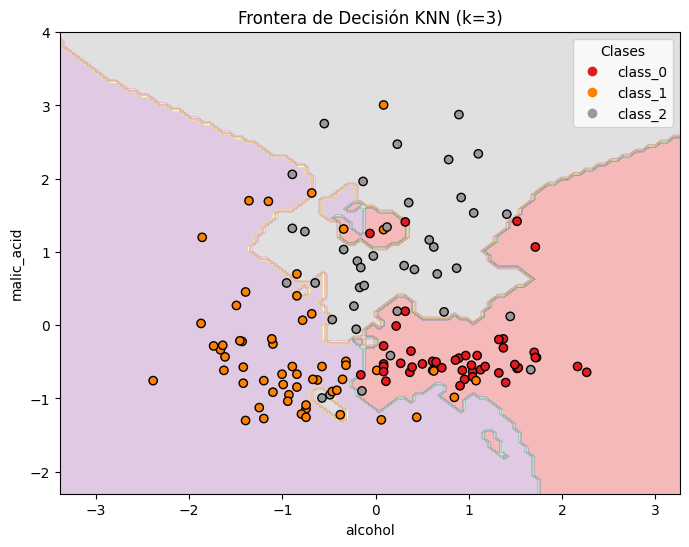

In [ ]:
# Función para graficar la frontera de decisión
def plot_decision_boundary(model, X, y, title="Frontera de Decisión KNN"):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1  # Límites del eje X
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1  # Límites del eje Y
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))  # Crear una malla de puntos
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])  # Predecir para cada punto de la malla
    Z = Z.reshape(xx.shape)  # Reestructurar la salida para graficarla

    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Set1)  # Graficar las regiones de decisión
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolors="k")  # Graficar los puntos de datos
    plt.xlabel(wine.feature_names[0])  # Etiqueta del eje X
    plt.ylabel(wine.feature_names[1])  # Etiqueta del eje Y
    plt.title(title)  # Título del gráfico

    handles, _ = scatter.legend_elements()  # Obtener elementos de la leyenda
    plt.legend(handles, wine.target_names, title="Clases")  # Agregar la leyenda con las clases

    plt.show()

# Graficar la frontera de decisión con el mejor modelo
plot_decision_boundary(knn_best, X_train_scaled, y_train, title=f"Frontera de Decisión KNN (k={best_k})")

# **<> Conclusiones**

La selección del valor de k es crucial para el rendimiento del modelo, ya que influye en la precisión de la clasificación, además, el escalado de los datos con StandardScaler mejora el desempeño al evitar que diferencias en magnitudes afecten el cálculo de distancias. La visualización de la frontera de decisión muestra que KNN es sensible a la distribución de los datos, lo que puede afectar su efectividad en conjuntos con clases solapadas. Aunque es un algoritmo intuitivo, su costo computacional puede ser elevado en grandes volúmenes de datos debido al cálculo de distancias para cada predicción. Finalmente, el reporte de clasificación permite evaluar el desempeño del modelo por clase, identificando posibles sesgos o problemas de desbalance en la clasificación.